In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from prepare import train_val_test
import acquire

In [20]:
titanic = pd.read_csv('titanic.csv')        # importing data
titanic.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [21]:
def prep_titanic(titanic):
    '''
    cleaning titantic data and creating dummies
    '''
    titanic.drop(columns=['class','embarked', 'passenger_id', 'deck', 'age', 'Unnamed: 0'], inplace=True)
    
    titanic_dummies = pd.get_dummies(titanic[['sex', 'embark_town']], drop_first=True)
    titanic = pd.concat([titanic, titanic_dummies], axis=1)
    
    return titanic

In [22]:
titanic = prep_titanic(titanic)      # calling cleaning function
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   embark_town              889 non-null    object 
 7   alone                    891 non-null    int64  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Queenstown   891 non-null    uint8  
 10  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 58.4+ KB


In [24]:
titanic['survived'].value_counts()           # determining which survival outcome is most common

0    549
1    342
Name: survived, dtype: int64

In [25]:
titanic['base'] = 0             # creating baseline column with most common survival outcome
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sex                      891 non-null    object 
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   embark_town              889 non-null    object 
 7   alone                    891 non-null    int64  
 8   sex_male                 891 non-null    uint8  
 9   embark_town_Queenstown   891 non-null    uint8  
 10  embark_town_Southampton  891 non-null    uint8  
 11  base                     891 non-null    int64  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 65.4+ KB


In [26]:
(titanic['base'] == titanic['survived']).mean()       # determine accuracy of baseline

0.6161616161616161

In [27]:
titanic = titanic.drop(columns=['embark_town', 'sex'])      # dropping string columns which already have 
                                                            # dummies created for them

In [28]:
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   alone                    891 non-null    int64  
 6   sex_male                 891 non-null    uint8  
 7   embark_town_Queenstown   891 non-null    uint8  
 8   embark_town_Southampton  891 non-null    uint8  
 9   base                     891 non-null    int64  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.5 KB


In [29]:
train, val, test = train_val_test(titanic, 'survived')       # splitting data

In [30]:
train.shape, val.shape, test.shape                   # checking to make sure split correctly

((623, 10), (134, 10), (134, 10))

In [31]:
X_train = train.drop(columns='survived')            # creating split for decision tree classifier
y_train = train['survived']

X_val = val.drop(columns='survived')
y_val = val['survived']

X_test = test.drop(columns='survived')
y_test = test['survived']

In [32]:
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=42)        # creating decision tree classifier

In [33]:
clf.fit(X_train, y_train)                    # fitting clf to data

DecisionTreeClassifier(max_depth=3, random_state=42)

In [34]:
clf.score(X_train, y_train)                # determine accuracy of clf on the train data

0.812199036918138

In [35]:
val_preds = clf.predict(X_val)              # creating prediction from the trained clf on the validate data

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


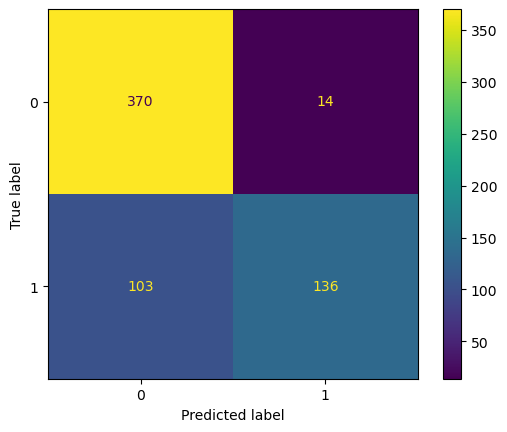

In [36]:
plot_confusion_matrix(clf, X_train, y_train)

In [421]:
print(classification_report(y_val, val_preds))          # viewing outcome of the decision tree classifier 
                                                        # on the validate data

              precision    recall  f1-score   support

           0       0.79      0.98      0.87        82
           1       0.94      0.60      0.73        52

    accuracy                           0.83       134
   macro avg       0.87      0.79      0.80       134
weighted avg       0.85      0.83      0.82       134



- A depth of 18 appears to give the best results for the train sample with an accuracy 93%.
- A depth of 3 appears to give the best results for the validate sample with an accuracy of 82-83%.

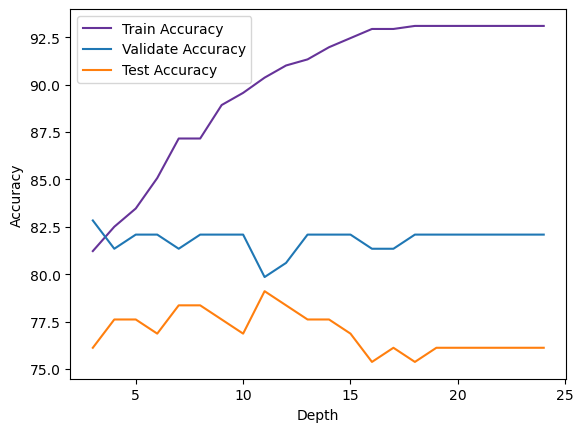

In [416]:
train_acc = []                      # creating variables
val_acc = []
depth = []
test_acc = []

for i in range(3, 25):
    seed = 42               
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)     # creating decision tree classifier
    
    clf.fit(X_train, y_train)
    
    t_acc = (clf.score(X_train, y_train) * 100)        # scoring accuracy for train and saving to a list
    train_acc.append(t_acc)
    
    v_acc = (clf.score(X_val, y_val) * 100)        # scoring accuracy for validate and saving to a list
    val_acc.append(v_acc)
    depth.append(i)
    
    tt_acc = (clf.score(X_test, y_test) * 100)        # scoring accuracy for test and saving to a list
    test_acc.append(tt_acc)
    




plt.plot(depth, train_acc, color='rebeccapurple', label='Train Accuracy')
plt.plot(depth, val_acc, label='Validate Accuracy')                     # creating plot for train, val and test
plt.plot(depth, test_acc, label='Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')                       # labeling axies
plt.legend()
plt.show()
    

In [39]:
y_preds = clf.predict(X_train)

In [41]:
TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()

In [42]:
TN, FP, FN, TP

(370, 14, 103, 136)

In [43]:
negative_cases = TN + FP
positive_cases = FN + TP

In [44]:
print(f'Negative Cases: {negative_cases}')
print(f'Positive Cases: {positive_cases}')
print(y_train.value_counts())

Negative Cases: 384
Positive Cases: 239
0    384
1    239
Name: survived, dtype: int64


In [47]:
for i in range(1, 21):
    trees = DecisionTreeClassifier(max_depth=i, random_state=123)
    trees = trees.fit(X_train, y_train)
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict=True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.812808    0.751152  0.791332    0.781980      0.789155
recall       0.859375    0.682008  0.791332    0.770692      0.791332
f1-score     0.835443    0.714912  0.791332    0.775178      0.789204
support    384.000000  239.000000  0.791332  623.000000    623.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.782241    0.906667  0.812199    0.844454      0.829974
recall       0.963542    0.569038  0.812199    0.766290      0.812199
f1-score     

In [48]:
metrics = []

for i in range(1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_val, y_val)
    
    output= {'max_depth':i, 'train_accuracy':in_sample_accuracy, 'validate_accuracy':out_of_sample_accuracy}
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df['difference'] = df['train_accuracy'] - df['validate_accuracy']
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.791332,0.813433,-0.022101
1,2,0.791332,0.813433,-0.022101
2,3,0.812199,0.828358,-0.016159
3,4,0.825040,0.813433,0.011607
4,5,0.834671,0.820896,0.013775
5,6,0.850722,0.820896,0.029827
6,7,0.871589,0.820896,0.050694
7,8,0.871589,0.813433,0.058156
8,9,0.889246,0.805970,0.083275
9,10,0.895666,0.820896,0.074771


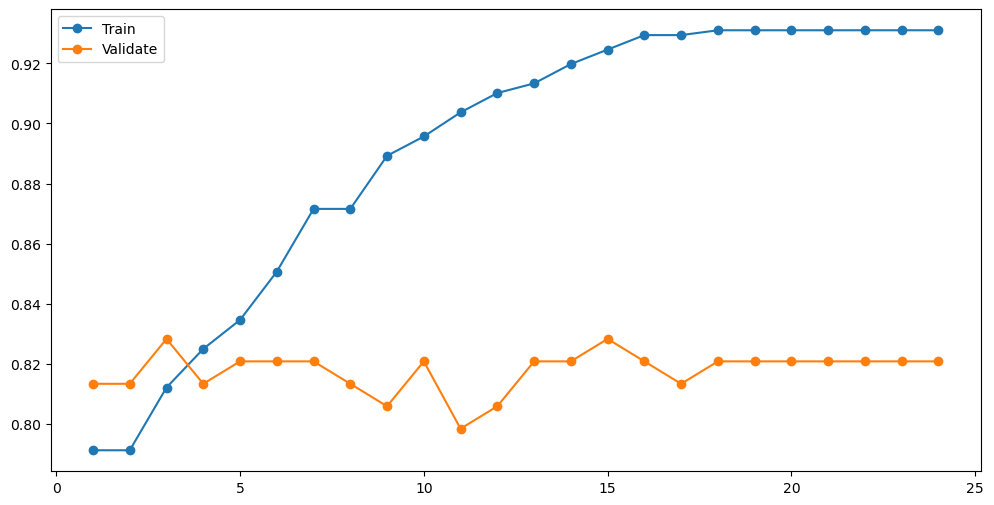

In [72]:
plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label='Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label='Validate')
plt.legend()
plt.show()

In [223]:
confusion_matrix(y_val, val_preds)          # creating confusion matrix from val data

array([[77,  5],
       [19, 33]])

In [224]:
class_names = np.array(clf.classes_).astype('str').tolist()

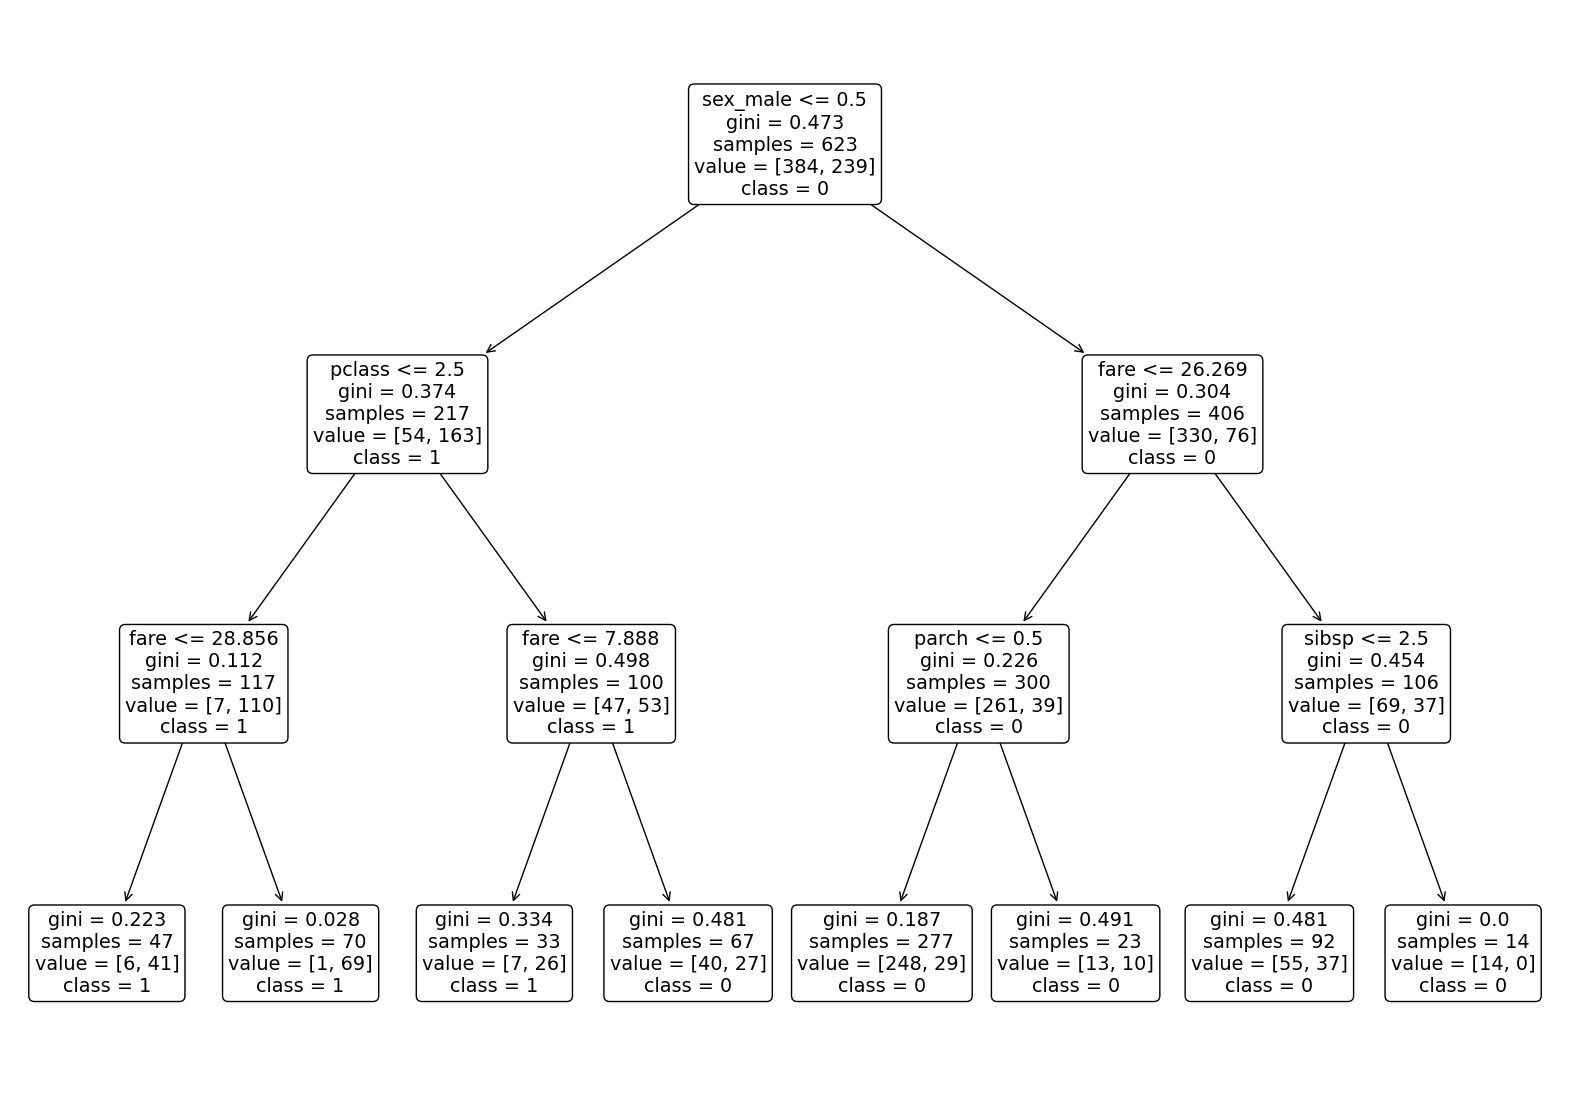

In [279]:
plt.figure(figsize=(20, 14))
                                               # creating decision tree figure
plot_tree(clf, feature_names=X_train.columns, 
          class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)

plt.show()

## Telco Database

In [53]:
telco = pd.read_csv('telco.csv')

In [54]:
def prep_telco(telco):
    '''
    cleaning telco data and creating dummies for data
    also converting total charges column to floats to manipulate data more effectively
    '''
    telco.drop(columns=['Unnamed: 0', 'payment_type_id', 'contract_type_id', 
                        'internet_service_type_id', 'customer_id'], inplace=True)
    
    telco['total_charges'] = (telco['total_charges'] + '0').astype('float')

    
    telco_dummies = pd.get_dummies(telco[['gender', 'partner', 'dependents', 
                                      'phone_service', 'multiple_lines', 
                                      'online_security', 'online_backup', 
                                      'device_protection', 'tech_support', 
                                      'streaming_tv', 'streaming_movies', 
                                      'paperless_billing', 'churn', 'internet_service_type', 
                                      'contract_type', 'payment_type']], drop_first=True)
    
    telco = pd.concat([telco, telco_dummies], axis=1)
    
    return telco

In [55]:
telco = prep_telco(telco)
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   partner                                7043 non-null   object 
 3   dependents                             7043 non-null   object 
 4   tenure                                 7043 non-null   int64  
 5   phone_service                          7043 non-null   object 
 6   multiple_lines                         7043 non-null   object 
 7   online_security                        7043 non-null   object 
 8   online_backup                          7043 non-null   object 
 9   device_protection                      7043 non-null   object 
 10  tech_support                           7043 non-null   object 
 11  stre

In [56]:
telco.drop(columns=['partner', 'dependents', 'phone_service', 'multiple_lines', 
                    'online_security', 'online_backup', 'device_protection',
                    'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                    'churn', 'internet_service_type', 'contract_type','payment_type', 'gender'], inplace=True)

                    # dropping object columns now that dummies have been created

In [57]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   monthly_charges                        7043 non-null   float64
 3   total_charges                          7043 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   partner_Yes                            7043 non-null   uint8  
 6   dependents_Yes                         7043 non-null   uint8  
 7   phone_service_Yes                      7043 non-null   uint8  
 8   multiple_lines_No phone service        7043 non-null   uint8  
 9   multiple_lines_Yes                     7043 non-null   uint8  
 10  online_security_No internet service    7043 non-null   uint8  
 11  onli

In [58]:
train_tel, val_tel, test_tel = train_val_test(telco, 'churn_Yes')   # splitting data 

In [59]:
train_tel.shape, val_tel.shape, test_tel.shape         # checking split sizes

((4930, 31), (1056, 31), (1057, 31))

In [60]:
X_train_tel = train_tel.drop(columns='churn_Yes')      # splitting data for decision tree
y_train_tel = train_tel['churn_Yes']

X_val_tel = val_tel.drop(columns='churn_Yes')
y_val_tel = val_tel['churn_Yes']

X_test_tel = test_tel.drop(columns='churn_Yes')
y_test_tel = test_tel['churn_Yes']

In [61]:
seed = 42

clf = DecisionTreeClassifier(max_depth=3, random_state=42)      # creating decision tree classifier

In [62]:
clf.fit(X_train_tel, y_train_tel)                 # fitting clf to data

DecisionTreeClassifier(max_depth=3, random_state=42)

In [63]:
clf.score(X_train_tel, y_train_tel)            # scoring accuracy of clf on train data

0.7912778904665314

In [64]:
val_preds_tel = clf.predict(X_val_tel)          # predicting validate outcomes

In [65]:
print(classification_report(y_val_tel, val_preds_tel))        # printing metrics of validate data and clf

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       776
           1       0.69      0.44      0.53       280

    accuracy                           0.80      1056
   macro avg       0.75      0.68      0.70      1056
weighted avg       0.78      0.80      0.78      1056



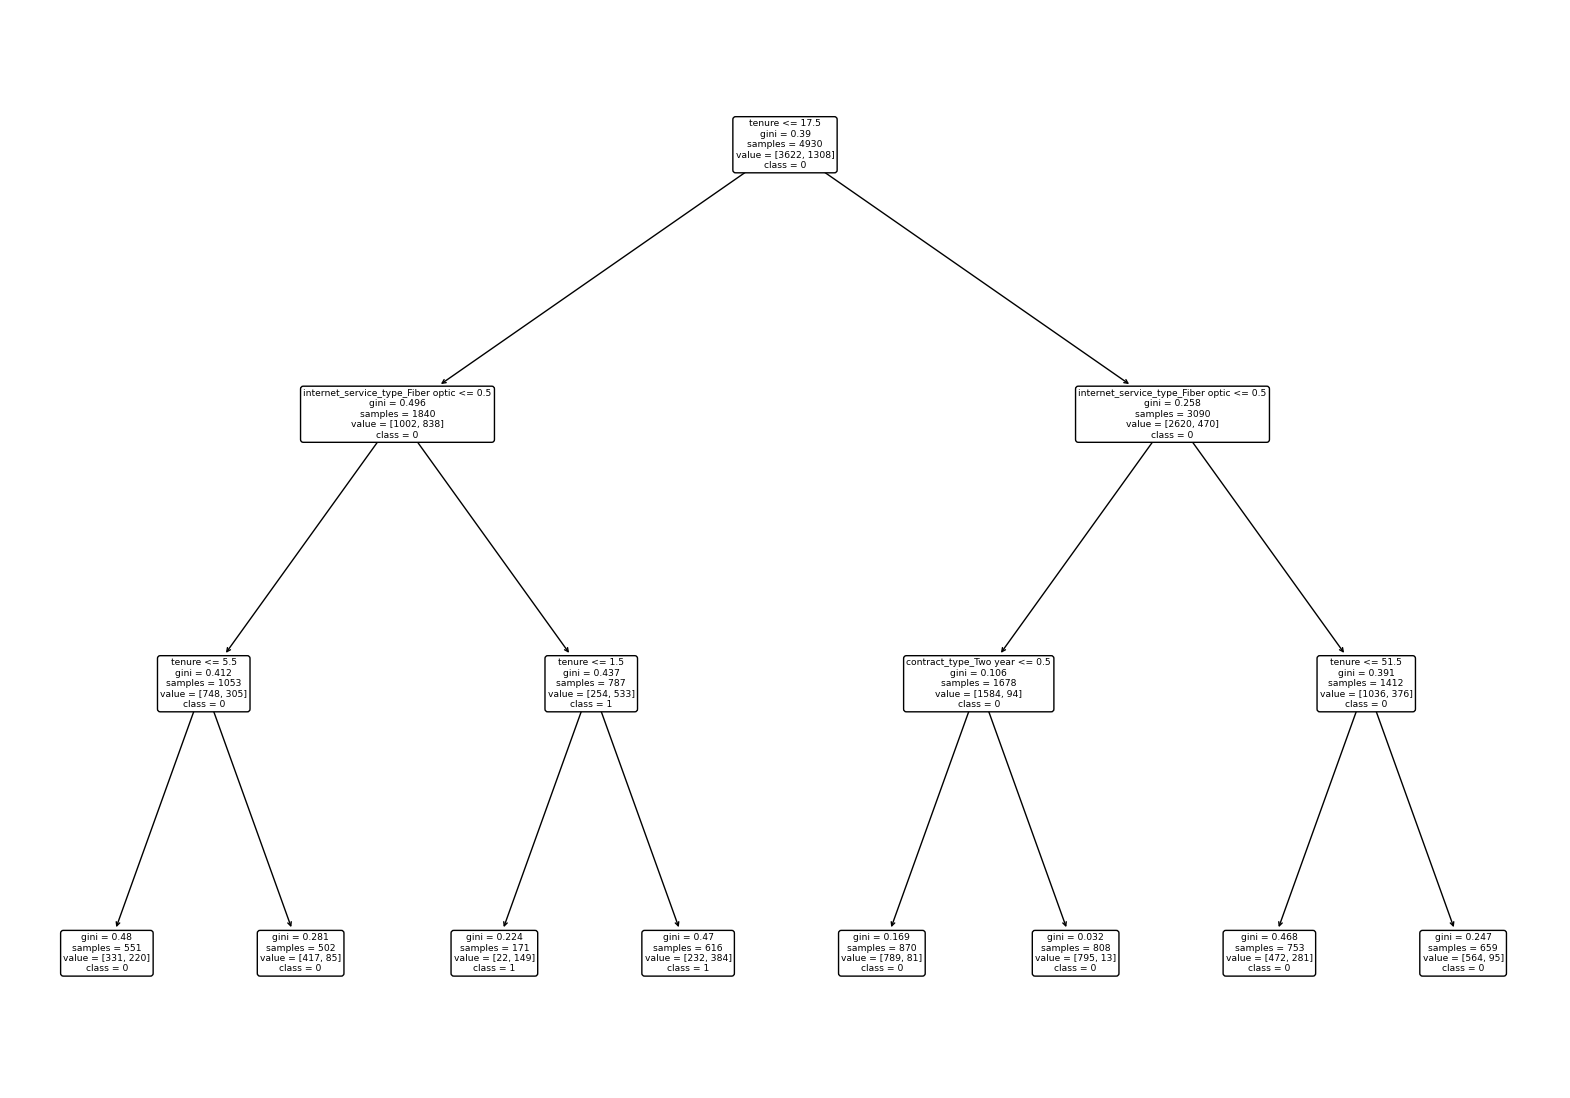

In [66]:
plt.figure(figsize=(20, 14))
                                                  # creating decision tree figure
plot_tree(clf, feature_names=X_train_tel.columns, 
          class_names = np.array(clf.classes_).astype('str').tolist(), rounded=True)

plt.show()

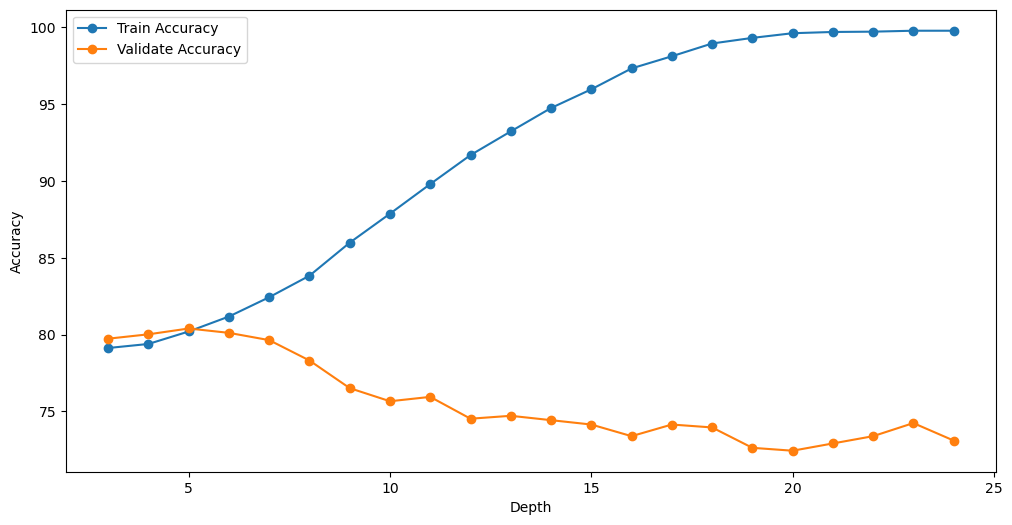

In [71]:
train_tel_acc = []                      # creating variables
val_tel_acc = []
depth = []
test_tel_acc = []

for i in range(3, 25):
    seed = 42               
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)     # creating decision tree classifier
    
    clf.fit(X_train_tel, y_train_tel)
    
    t_tel_acc = (clf.score(X_train_tel, y_train_tel) * 100)        # scoring accuracy for train and saving to a list
    train_tel_acc.append(t_tel_acc)
    
    v_tel_acc = (clf.score(X_val_tel, y_val_tel) * 100)        # scoring accuracy for validate and saving to a list
    val_tel_acc.append(v_tel_acc)
    depth.append(i)
    
    



plt.figure(figsize=(12,6))
plt.plot(depth, train_tel_acc, marker='o', label='Train Accuracy')
plt.plot(depth, val_tel_acc, marker='o', label='Validate Accuracy')    # creating plot for train and val
plt.xlabel('Depth')
plt.ylabel('Accuracy')                       # labeling axies
plt.legend()
plt.show()